In [51]:
#Basic imports
import sys

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

DATA_DIR = "/dfs/scratch0/googlengrams/2012-eng-fic/"
sys.path.append("../langchange")

import ioutils as util
from cooccurrence import matstore
from timeseries import plothelper, changepoint, trendestimator, seriesanalysis

%matplotlib inline

In [3]:
year_words = util.load_pickle(DATA_DIR + "/info/freqnonstop_peryear-1900-2000-7.pkl")
years = np.arange(1900, 2001)
freqs = util.load_pickle(DATA_DIR + "/info/freqnonstop_peryear-1900-2000-7-freqs.pkl")

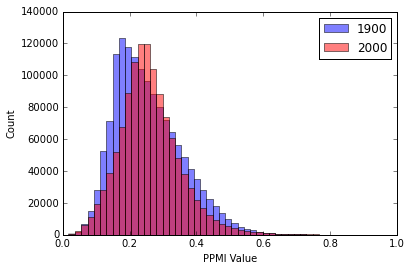

In [19]:
# Compare PPMI histograms for some representative years.
mat1900 = matstore.retrieve_mat_as_coo(DATA_DIR + "/nppmi_conf/lsmooth10/1900.bin")
mat2000 = matstore.retrieve_mat_as_coo(DATA_DIR + "/nppmi_conf/lsmooth10/2000.bin")
data1900 = mat1900.data[mat1900.data > 0]
data2000 = mat2000.data[mat2000.data > 0]
p = plt.hist(data1900, bins=50, alpha=0.5)
p = plt.hist(data2000, p[1], alpha=0.5, color="red")
plt.legend(["1900", "2000"])
plt.xlabel("PPMI Value")
plt.ylabel("Count")

(1889, 2008)

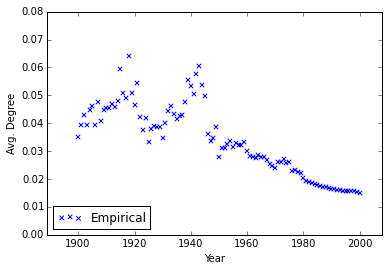

In [113]:
# Average degree
avg_deg = util.load_pickle(DATA_DIR + "/null_conf_test/alpha0.05/netstats/net-avg_clust.pkl")
null_avg_deg = util.load_pickle(DATA_DIR + "/conf/alpha0.05/netstats/net-avg_deg.pkl")
#plt.scatter(years, np.array(avg_deg.values())/np.array(null_avg_deg.values()), marker='+', s=30)
plt.scatter(years, avg_deg.values(), marker='x', s=20)
#plt.scatter(years, null_avg_deg.values(), marker='x', color='red', s=20)
plt.xlabel("Year")
plt.ylabel("Avg. Degree")
plt.legend(["Empirical", "Null Model"], loc='lower left')
plt.xlim(1889, 2008)

In [49]:
trendestimator.trend_estimate(avg_deg).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     7.193
Date:                Thu, 09 Jul 2015   Prob (F-statistic):            0.00858
Time:                        11:18:19   Log-Likelihood:                 392.41
No. Observations:                 101   AIC:                            -780.8
Df Residuals:                      99   BIC:                            -775.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.0987      0.001     99.511      0.000         0.097     0.101
x1         -4.596e-05   1.71e-05     -2.682      0.009        -8e-05  -1.2e-05
==============================================================================
Omnibus:                        0.266   Durbin-Watson:                   0.927
Prob(Omnibus):                  0.876   Jarque-Bera (JB):                0.442
Skew:                           0.060   Prob(JB):                        0.802
Kurtosis:                       2.699   Cond. No.                         115.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(0.986, 1.0)

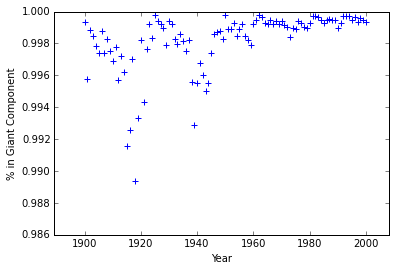

In [130]:
# Percent in largest connected component for network.
# Note the impact of the word wars
max_cc_size = util.load_pickle(DATA_DIR + "/conf/alpha0.05/netstats/net-max_cc_size.pkl")
plt.scatter(years, max_cc_size.values(), marker='+', s=30)
plt.xlabel("Year")
plt.ylabel("% in Giant Component")
plt.xlim(1889, 2008)
plt.ylim(0.986, 1.0)

(1889, 2009)

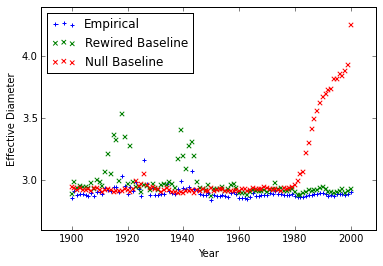

In [128]:
# Effective diameter of the network
eff_diam = util.load_pickle(DATA_DIR + "/conf/alpha0.05/netstats/net-eff_diam.pkl")
rw_eff_diam = util.load_pickle(DATA_DIR + "/conf/alpha0.05/netstats/net-rw-eff_diam.pkl")
null_eff_diam = util.load_pickle(DATA_DIR + "/null_conf/alpha0.05/netstats/net-eff_diam.pkl")
plt.scatter(years, eff_diam.values(), marker='+')
plt.scatter(years, rw_eff_diam.values(), marker='x', color='green')
plt.scatter(years, null_eff_diam.values(), marker='x', color='red')
plt.xlabel("Year")
plt.ylabel("Effective Diameter")
plt.legend(["Empirical", "Rewired Baseline", "Null Baseline"], loc='upper left')
plt.xlim(1889, 2009)

(0, 0.15)

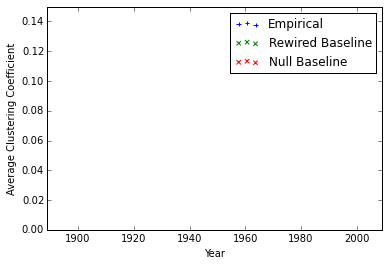

In [72]:
# Average network clustering
avg_clust = util.load_pickle(DATA_DIR + "/conf/alpha0.05/netstats/net-avg_deg.pkl")
avg_clust_rw = util.load_pickle(DATA_DIR + "/conf/alpha0.05/netstats/net-rw-avg_deg.pkl")
avg_clust_null = util.load_pickle(DATA_DIR + "/null_conf/alpha0.05/netstats/net-avg_deg.pkl")
plt.scatter(years, avg_clust.values(), marker='+')
plt.scatter(years, avg_clust_rw.values(), marker='x', color='green')
plt.scatter(years, avg_clust_null.values(), marker='x', color='red')
plt.xlabel("Year")
plt.ylabel("Average Clustering Coefficient")
plt.legend(["Empirical", "Rewired Baseline", "Null Baseline"])
plt.xlim(1889, 2009)
#plt.ylim(0, 0.15)

In [7]:
trendestimator.trend_estimate(avg_clust).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.525
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     109.2
Date:                Tue, 30 Jun 2015   Prob (F-statistic):           1.14e-17
Time:                        21:14:34   Log-Likelihood:                 352.27
No. Observations:                 101   AIC:                            -700.5
Df Residuals:                      99   BIC:                            -695.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.0894      0.001     60.558      0.000         0.086     0.092
x1            -0.0003   2.55e-05    -10.451      0.000        -0.000    -0.000
==============================================================================
Omnibus:                        5.928   Durbin-Watson:                   0.717
Prob(Omnibus):                  0.052   Jarque-Bera (JB):                5.301
Skew:                           0.515   Prob(JB):                       0.0706
Kurtosis:                       3.445   Cond. No.                         115.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [141]:
degs = util.load_pickle(DATA_DIR + "/5grams_sym/bootstats/freqnonstop_peryear-1900-2000-7-top20000-deg-mean.pkl")
degs_noconf = util.load_pickle(DATA_DIR + "/5grams_sym/bootstats_noconf/freqnonstop_peryear-1900-2000-7-top20000-deg-mean.pkl")
degs_fwer = util.load_pickle(DATA_DIR + "/5grams_sym/bootstats-0.1-True/freqnonstop_peryear-1900-2000-7-top20000-deg-mean.pkl")
null_degs = util.load_pickle(DATA_DIR + "/null_sym/bootstats/freqnonstop_peryear-1900-2000-7-top20000-deg-mean.pkl")

In [165]:
sums = util.load_pickle(DATA_DIR + "/5grams_sym/bootstats/freqnonstop_peryear-1900-2000-7-top20000-sum-mean.pkl")
null_sums = util.load_pickle(DATA_DIR + "/null_sym/bootstats/freqnonstop_peryear-1900-2000-7-top20000-sum-mean.pkl")

In [162]:
wclusts = util.load_pickle(DATA_DIR + "/5grams_sym/bootstats/freqnonstop_peryear-1900-2000-7-top20000-wclust-mean.pkl")
null_wclusts = util.load_pickle(DATA_DIR + "/null_sym/bootstats/freqnonstop_peryear-1900-2000-7-top20000-wclust-mean.pkl")

In [172]:
bclusts = util.load_pickle(DATA_DIR + "/5grams_sym/bootstats/freqnonstop_peryear-1900-2000-7-top20000-bclust-mean.pkl")
null_bclusts = util.load_pickle(DATA_DIR + "/null_sym/bootstats/freqnonstop_peryear-1900-2000-7-top20000-bclust-mean.pkl")

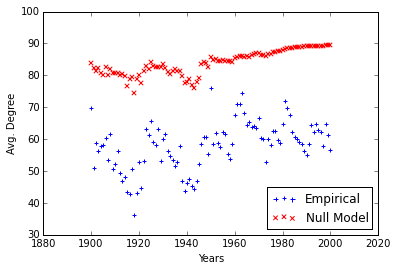

In [178]:
#deg_stat = seriesanalysis.get_series_mean_std(degs, degs.keys())
#fwer_deg_stat = seriesanalysis.get_series_mean_std(degs, degs.keys())
#null_deg_stat = seriesanalysis.get_series_mean_std(null_degs, null_degs.keys())
plt.scatter(years, deg_stat[0], marker='+')
plt.scatter(years, null_deg_stat[0], marker='x', color='red')
plt.legend(["Empirical", "Null Model"], loc='lower right')
plt.ylabel("Avg. Degree")
plt.xlabel("Years")
#plt.scatter(years, avg_deg.values(), marker='x', s=20)

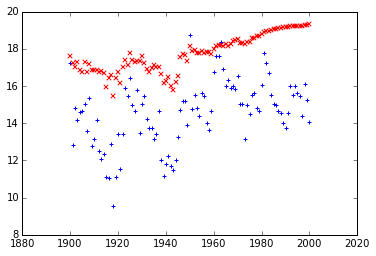

In [167]:
#sum_stat = seriesanalysis.get_series_mean_std(sums, sums.keys())
#null_sum_stat = seriesanalysis.get_series_mean_std(null_sums, null_sums.keys())
plt.scatter(years, sum_stat[0], marker='+')
plt.scatter(years, null_sum_stat[0], marker='x', color='red')

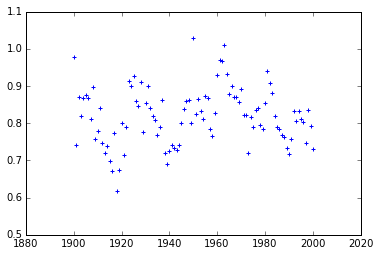

In [168]:
plt.scatter(years, sum_stat[0]/null_sum_stat[0], marker='+')

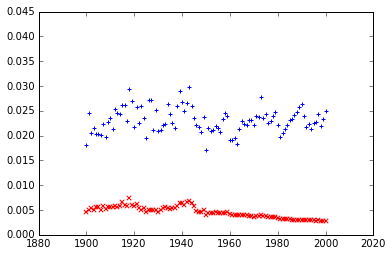

In [169]:
#wclust_stat = seriesanalysis.get_series_mean_std(wclusts, wclusts.keys())
null_wclust_stat = seriesanalysis.get_series_mean_std(null_wclusts, null_wclusts.keys())
plt.scatter(years, wclust_stat[0], marker='+')
plt.scatter(years, null_wclust_stat[0], marker='x', color='red')

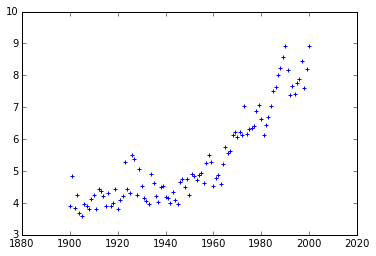

In [170]:
plt.scatter(years, wclust_stat[0]/null_wclust_stat[0], marker='+')

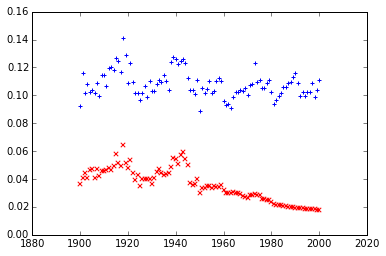

In [173]:
bclust_stat = seriesanalysis.get_series_mean_std(bclusts, bclusts.keys())
null_bclust_stat = seriesanalysis.get_series_mean_std(null_bclusts, null_bclusts.keys())
plt.scatter(years, bclust_stat[0], marker='+')
plt.scatter(years, null_bclust_stat[0], marker='x', color='red')

In [175]:
trendestimator.trend_estimate_arr(null_bclust_stat[0]).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                     255.2
Date:                Tue, 14 Jul 2015   Prob (F-statistic):           3.73e-29
Time:                        15:30:48   Log-Likelihood:                 370.09
No. Observations:                 101   AIC:                            -736.2
Df Residuals:                      99   BIC:                            -731.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.0528      0.001     42.689      0.000         0.050     0.055
x1            -0.0003   2.14e-05    -15.974      0.000        -0.000    -0.000
==============================================================================
Omnibus:                       30.113   Durbin-Watson:                   0.411
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.312
Skew:                           1.222   Prob(JB):                     9.75e-13
Kurtosis:                       5.679   Cond. No.                         115.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [124]:
test = util.load_pickle(DATA_DIR + "/null_sym/bootstats/freqnonstop_peryear-1900-2000-7-top20000-0.pkl")

In [139]:
import collections
null_means = collections.defaultdict(dict)
for word in test["wclust"]:
    for year, val in test["wclust"][word].iteritems():
        if type(val) == float:
            null_means[word][year] = val
        else:
            null_means[word][year] = val.mean()

In [129]:
test

KeyboardInterrupt: 

(1889, 2009)

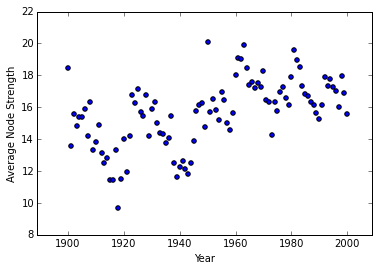

In [66]:
#sums_stat = seriesanalysis.get_series_mean_stderr(sums, sums.keys())
plt.scatter(years, sums_stat[0])
plt.xlabel("Year")
plt.ylabel("Average Node Strength")
plt.xlim(1889, 2009)

(0.25, 0.28)

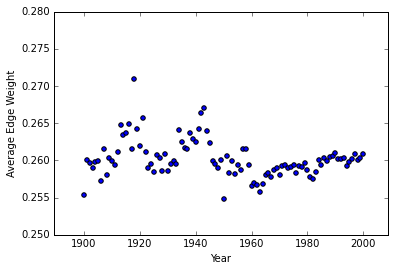

In [68]:
plt.scatter(years, sums_stat[0] / np.array(avg_deg.values()))
plt.xlabel("Year")
plt.ylabel("Average Edge Weight")
plt.xlim(1889, 2009)
plt.ylim(0.25, 0.28)

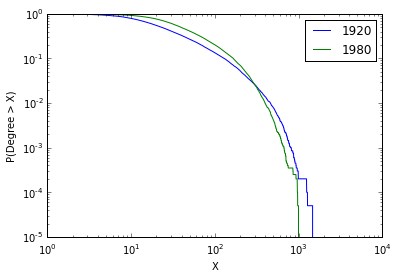

In [85]:
## CCDFs seem to implicate an exponential more than scale-free
## No big changes in CCDF structure over time...
deg_hist = util.load_pickle(DATA_DIR + "/conf/alpha0.01/netstats/net-deg_hist.pkl")
plot_years = [1920, 1980]
for year in plot_years:
    ccdf = plothelper.get_ccdf(deg_hist[year])
    plt.plot(ccdf[0], ccdf[1])
plt.legend(plot_years)
plt.xscale('log')
plt.yscale('log')
plt.xlabel("X")
plt.ylabel("P(Degree > X)")

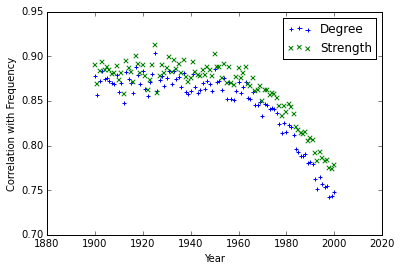

In [95]:
# Frequency plays a decreasing role in determining node importance!
#freq_sum_corr, freq_sum_p = seriesanalysis.series_corr(freqs, sums, year_words)
#freq_deg_corr, freq_deg_p = seriesanalysis.series_corr(freqs, degs, year_words)
plt.scatter(years, freq_sum_corr, marker='+')
plt.scatter(years, freq_deg_corr, marker='x', color="green")
plt.xlabel("Year")
plt.ylabel("Correlation with Frequency")
plt.legend(["Degree", "Strength"])

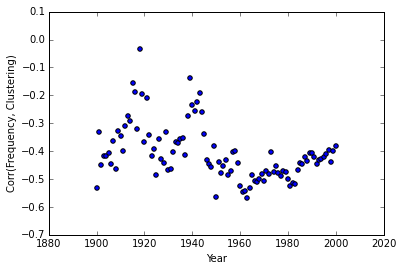

In [97]:
# No temporal trend for clustering, but Zipf was right!
#freq_clust_corr, freq_clust_p = seriesanalysis.series_corr(bclusts, degs, year_words)
plt.scatter(years, freq_clust_corr)
plt.xlabel("Year")
plt.ylabel("Corr(Frequency, Clustering)")